# Exploratory data analysis - Visualization

The curated data(curated_m2_data2.csv) need to be corrected for the classification of instore and electronic. The classification is based on the the feature __"posentrymode"__ . The source of classifying this data is https://www.mreports.com/documentation/ac/nonmerchant/80451.htm. 

Another attribute __"posconditioncode_desc"__ is added and this is the description or label associated with the attribute __"posconditioncode"__. The source for the decription/label is https://www.mreports.com/documentation/ac/nonmerchant/80449.htm. The posconsitioncode primarily identifies the transaction conditions at the point of sale/service.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('/dsa/groups/casestudy2021f/group_2/curated_data_m2.csv')

In [3]:
#online_instore classification corrected based on 
#https://www.aibms.com/wp-content/uploads/2014/12/GL_OPS_1205003.pdf
def online_instore(x):
    if x == 2 or x == 5 or x ==90 or x==80:
        return 'instore'
    
    elif x == 9:
        return 'electronic'
    else:
        return 'missing'

df['iselectronic'] = df['posentrymode'].apply(online_instore)
# df.loc[:,('posconditioncode','pos_description','posentrymode','iselectronic')].value_counts()

In [4]:
# adding pos condition code description based on https://www.mreports.com/documentation/ac/nonmerchant/80449.htm
def poscondition_desc(x):
    if x == 1:
        return 'card holder not present'
    elif x == 8:
        return 'mail/telephone order'
    else:
        return 'missing'
df['posconditioncode_desc'] = df['posconditioncode'].apply(poscondition_desc)

## 1.Exploring the ratio of transactions that are fraud Vs not-fraud

-  A piechart in Figure 1 below that breaks uo the transactions into Fraud and Non Fraud show that 98% of the transactions are not fraud and only 2% of the transactions are fraud. The classification has been done on basis of feature customerid. Another similar feature accountid is there in the data and it was analyzed to see if customerid and accountid are different for a given transaction. And the results (1a below) show that customerid and accountid are infact similar.Thus this also shows that every row in the data is an individual trasaction.

### 1.a Check if accountid and customerid for a transaction are different

In [5]:
df.loc[df['customerid'] != df['accountnumber']]

,Unnamed: 0,accountnumber,accountopendate,acqcountry,amount_classify,availablemoney,cardcvv,cardlast4digits,cardpresent,creditlimit,...,posconditioncode,posentrymode,posonpremises,recurringauthind,transactionamount,transactiondatetime,transactiontype,year,iselectronic,posconditioncode_desc


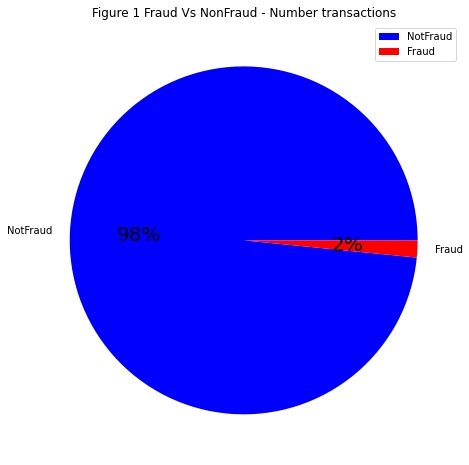

In [6]:
values = df['isfraud'].value_counts().array
plt.figure(figsize=(8,8))
data, lab, texts = plt.pie(df['isfraud'].value_counts(), labels = ['NotFraud','Fraud'],autopct ='%0.0f%%', colors = ['b','r'])
# for i, a in enumerate(texts):
#     a.set_text("{}".format(values[i]))
for i, a in enumerate(texts):
    a.set_fontsize(20)
plt.legend(['NotFraud','Fraud'],loc = 'upper right')
plt.title("Figure 1 Fraud Vs NonFraud - Number transactions")
plt.show()

## 2.Exploring fraud or not fraud transactions on the basis of merchant category

-  Figure 2.1 below shows that the ratio of fraud and non fraud is more less the same or no clustering of data can be observed. <br>
-  Figure 2.2 below shows the distribution of only fraud transactions and the pattern revleas that only a clustering is observed for online retail <br>
-  Figure 2.3 below shows the distribution of  fraud transactions for the various merchants in online-retail category


In [7]:
merchant_fraud_dis = df.loc[:,('merchantcategorycode','isfraud')].groupby(['merchantcategorycode','isfraud']).size().unstack(
    fill_value=0,level =['isfraud']).stack(['isfraud']).reset_index().rename(columns={ 0: 'nooftransactions'})

In [8]:
merchant_fraud_dis = merchant_fraud_dis.sort_values(by = ['isfraud','nooftransactions'])

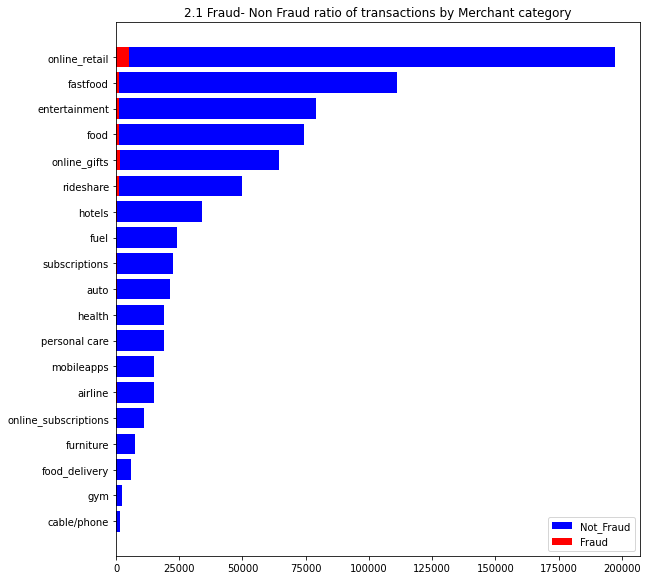

In [9]:

fig, ax = plt.subplots( figsize = (8,8))
fig.subplots_adjust(bottom=0.15, left=0.2)
fig.tight_layout()
ax.set_title('2.1 Fraud- Non Fraud ratio of transactions by Merchant category')
nonfraud = merchant_fraud_dis[merchant_fraud_dis.isfraud ==False]
fraud = merchant_fraud_dis[merchant_fraud_dis.isfraud ==True]
ax.barh(nonfraud['merchantcategorycode'], nonfraud['nooftransactions'], color='b')
ax.barh(fraud['merchantcategorycode'], fraud['nooftransactions'],color='r')
ax.set_xlabel = 'Number of transactions'
ax.set_ylabel = 'Merchant category'


ax.legend(labels=['Not_Fraud', 'Fraud'], loc  = 'lower right')
plt.show()

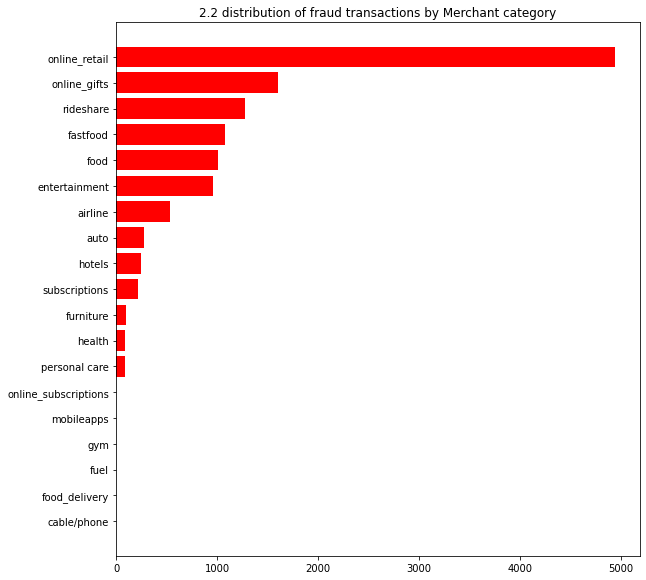

In [10]:
fig, ax = plt.subplots( figsize = (8,8))
fig.subplots_adjust(bottom=0.15, left=0.2)
fig.tight_layout()
ax.set_title('2.2 distribution of fraud transactions by Merchant category')
# nonfraud = merchant_fraud_dis[merchant_fraud_dis.isfraud ==False]
# fraud = merchant_fraud_dis[merchant_fraud_dis.isfraud ==True]
# ax.barh(nonfraud['merchantcategorycode'], nonfraud['nooftransactions'], color='b')
ax.barh(fraud['merchantcategorycode'], fraud['nooftransactions'],color='r')
ax.set_xlabel = 'Number of transactions'
ax.set_ylabel = 'Merchant category'

In [11]:
df_onlineretail_merchant = df.loc[df['merchantcategorycode']=='online_retail',('merchant_name_uq','isfraud')].groupby(['merchant_name_uq','isfraud']).size().unstack(
    fill_value = 0, level = ['isfraud'])
df_onlineretail_merchant.columns = [str(col) for col in df_onlineretail_merchant.columns.values]
df_onlineretail_merchant = df_onlineretail_merchant.reset_index()

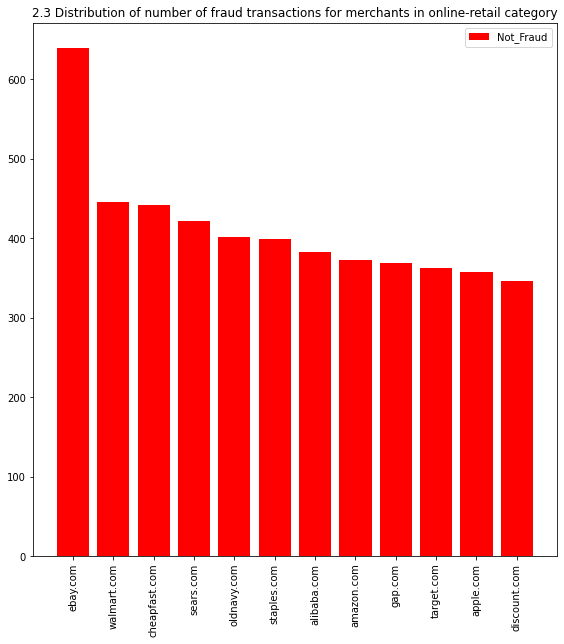

In [12]:
fig, ax = plt.subplots( figsize = (8,8))
fig.subplots_adjust(bottom=0.15, left=0.2)
fig.tight_layout()
online_retailers_df = df_onlineretail_merchant.sort_values(by=['True'], ascending = False)
online_retailers = online_retailers_df.loc[:,'merchant_name_uq']
# nonfraud = df_onlineretail_merchant.loc[:,'False']
fraud =  online_retailers_df.loc[:,('True')]
# ax.bar(online_retailers, nonfraud, color='b')
ax.bar(online_retailers, fraud,color='r')
ax.set_xlabel = 'Number of transactions'
ax.set_ylabel = 'Merchant name'

ax.set_title('2.3 Distribution of number of fraud transactions for merchants in online-retail category')
ax.legend(labels=['Not_Fraud', 'Fraud'], loc  = 'upper right')
ax.set_xticks(online_retailers)
ax.set_xticklabels(online_retailers, rotation = 90) 
plt.show()

## 3. Exploring the pattern of data for pos condition decription
-  Pos condition describes the conditions at the time of transactions. The conditions that were present in the data were  whether the card holder was present or not. Card holder not present reflects transactions made by mail order or telephonic orders. The Figure 3 below shows that majority of 85%  of the fraud happended when the card holder wasn't present at the time of the transaction.

In [13]:
df_poscondition = df.loc[:,('posconditioncode_desc','isfraud')].groupby(['posconditioncode_desc','isfraud']).size().unstack(
    fill_value = 0, level = ['isfraud'])
df_poscondition.columns = [str(col) for col in df_poscondition.columns.values]
df_poscondition = df_poscondition.reset_index()
df_poscondition =  df_poscondition.loc[df_poscondition['posconditioncode_desc']!='missing',]
df_poscondition

,posconditioncode_desc,False,True
0,card holder not present,618557,10230
1,mail/telephone order,147698,1936


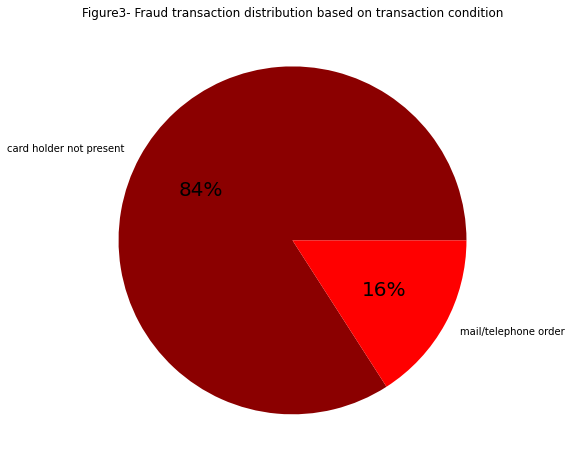

In [14]:
values = df_poscondition.loc[:,'True'].array
plt.figure(figsize=(8,8))
data, lab, texts = plt.pie(df_poscondition.loc[:,'True'], labels = df_poscondition.loc[:,'posconditioncode_desc'],autopct 
                           ='%0.0f%%', colors = ['darkred','red'])
# for i, a in enumerate(texts):
#     a.set_text("{}".format(values[i]))
for i, a in enumerate(texts):
    a.set_fontsize(20)
# plt.legend(df_poscondition.loc[:,'posconditioncode_desc'],loc = 'upper right')
plt.title("Figure3- Fraud transaction distribution based on transaction condition")
plt.show()

## 4. Exploring a effect of time/month on occurence of fraud

-  Figure 4 suggests that there is no clustering of fraud transactions around any month. The month was obtained from the feature transaction time.

In [15]:
month_fraud_dis = df.loc[:,('month','isfraud')].groupby(['month','isfraud']).size().unstack(fill_value=0,level =['isfraud']).stack(
    ['isfraud']).reset_index().rename(columns={ 0: 'nooftransactions'})


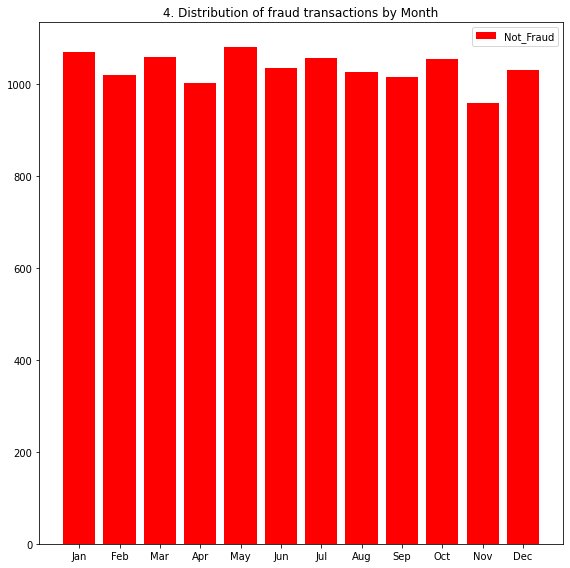

In [16]:

fig, ax = plt.subplots( figsize = (8,8))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.set_title('4. Distribution of fraud transactions by Month')
fig.tight_layout()

# nonfraud = month_fraud_dis[month_fraud_dis.isfraud ==False]
fraud = month_fraud_dis.loc[month_fraud_dis.isfraud ==True,].reset_index(drop = True)
labs = fraud.loc[:,'month']
# ax.bar(nonfraud['month'], nonfraud['nooftransactions'],color='b')
ax.bar(fraud['month'], fraud['nooftransactions'],color='r')
ax.set_xticks(labs)
ax.set_xticklabels(labels = pd.to_datetime(labs, format='%m').dt.month_name().str.slice(stop=3))
ax.legend(labels=['Not_Fraud'], loc  = 'upper right')
plt.show()

## 5. Explore to see clustering on the fraud transaction based on the amount of fraud transaction, electronic type and merchant category
-  Figure5.1 - shows that amonf the fraud transactions the smaller transaction amounts are more susceptible to fraud. <br>
The feature transactionamount was binned into various categories, namely; <$50,$50-100,$100-200,$200-300,$300-500,$500-1000,>=$1000

-  Figure 5.2 - The same fraud transactions was analyzed to see the pattern of two dimensions,  transaction amount and instore/electronic. As can be seen in the figure no discernible pattern can be observed. Or in other words, there is roughly an equal split on instore and electronic type of transactions for every transaction amount category.

-  Figure 5.3 - Another dimension, merchant category was added to figure 5.2 to see observe clustering. The figure shows that all merchant categories have same similar or no unique pattern of instore/ electronic transactions.

In [17]:
amount_classify_df = df.loc[:,('amount_classify','isfraud')].groupby(['amount_classify','isfraud']).size().unstack(
    fill_value=0,level =['isfraud']).stack(['isfraud']).reset_index().rename(columns={ 0: 'nooftransactions'})

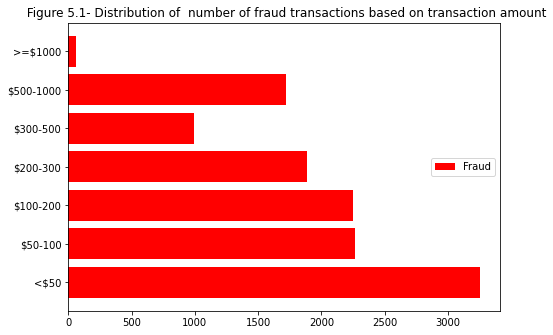

In [18]:
classify_labels = ('<$50','$50-100','$100-200','$200-300','$300-500','$500-1000','>=$1000')
fig = plt.figure()
w= 0.4
ax = fig.add_axes([0,0,1,1])
ax.set_title(' Figure 5.1- Distribution of  number of fraud transactions based on transaction amount')
# nonfraud = amount_classify_df[amount_classify_df.isfraud ==False]
fraud = amount_classify_df[amount_classify_df.isfraud ==True]
# ax.barh(nonfraud['month'], nonfraud['nooftransactions'],color='b')
ax.barh(fraud ['amount_classify'], fraud ['nooftransactions'],color='r')
ax.legend(labels=['Fraud'], loc  = 'center right')
ax.set_yticks(np.arange(len(df.amount_classify.unique())))
ax.set_yticklabels(classify_labels)
plt.show()

In [19]:
iselectronic_dis_df= df.loc[(df['isfraud']==True)].groupby(['amount_classify','iselectronic']).size().unstack(
fill_value=0,level =['iselectronic']).stack(['iselectronic']).reset_index().rename(columns={ 0: 'nooftransactions'})

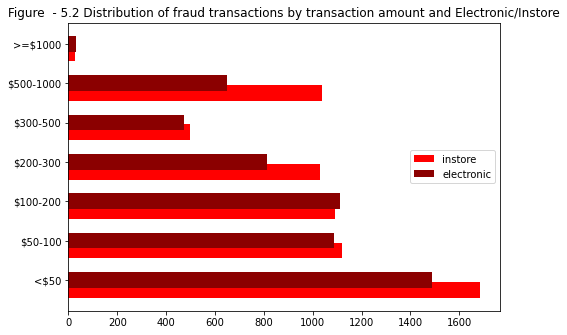

In [20]:
classify_labels = ('<$50','$50-100','$100-200','$200-300','$300-500','$500-1000','>=$1000')
fig = plt.figure()
w= 0.4
ax = fig.add_axes([0,0,1,1])
ax.set_title('Figure  - 5.2 Distribution of fraud transactions by transaction amount and Electronic/Instore')
instore = iselectronic_dis_df[iselectronic_dis_df.iselectronic=='instore']
electronic = iselectronic_dis_df[iselectronic_dis_df.iselectronic=='electronic']
ax.barh(np.arange(len(instore['amount_classify']))-0.25, instore['nooftransactions'],w,color='red')
ax.barh(np.arange(len(electronic['amount_classify'])), electronic['nooftransactions'],w,color='darkred')

ax.legend(labels=['instore','electronic'], loc  = 'center right')
ax.set_yticks(np.arange(len(df.amount_classify.unique())))
ax.set_yticklabels(classify_labels)
plt.show()

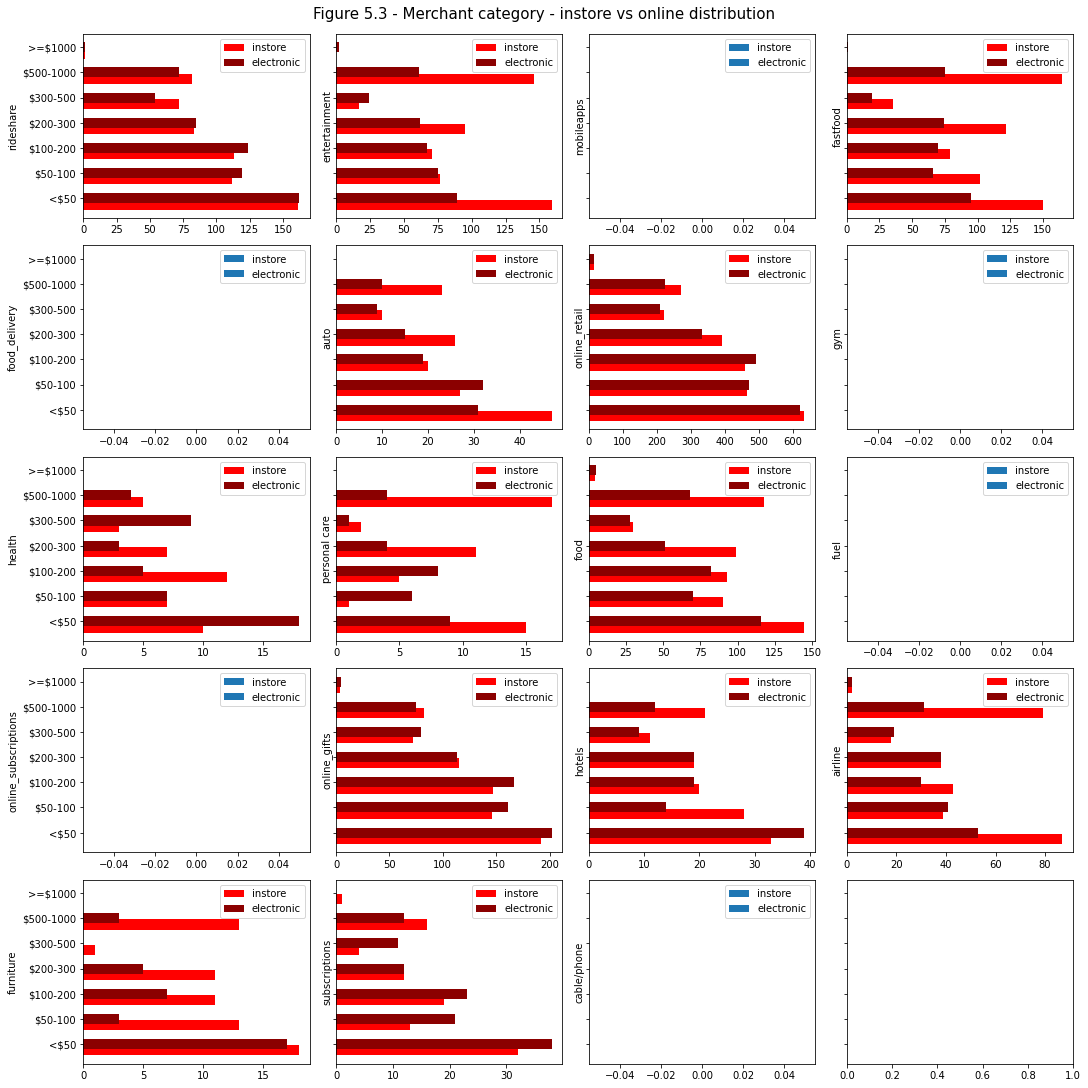

In [21]:


fig,axes =plt.subplots(5,4, figsize = (15,15), sharey = True, constrained_layout = True)
fig.suptitle('Figure 5.3 - Merchant category - instore vs online distribution',fontsize = 15)


mer_fraud_iselec = df.loc[(df['isfraud']==True),('merchantcategorycode','isfraud','amount_classify','iselectronic')].groupby(
    ['merchantcategorycode','isfraud','amount_classify','iselectronic']).size().unstack(
    fill_value=0,level =['iselectronic']).stack(['iselectronic']).reset_index().rename(
    columns={ 0: 'nooftransactions'})


for ax,merchant in zip(axes.flatten(),df.merchantcategorycode.unique()):  
    mer_fraud_sub=mer_fraud_iselec.loc[mer_fraud_iselec.merchantcategorycode==merchant]
    instore = mer_fraud_sub[mer_fraud_sub.iselectronic=='instore']
    electronic = mer_fraud_sub[mer_fraud_sub.iselectronic=='electronic']
    ax.barh(np.arange(len(instore['amount_classify']))-0.25, instore['nooftransactions'],w,color='red')
    ax.barh(np.arange(len(electronic['amount_classify'])), electronic['nooftransactions'],w,color='darkred')
    try :
        ax.legend(labels=['instore','electronic'],loc  = 'upper right')
    except:
        pass
    ax.set_yticks(np.arange(len(df.amount_classify.unique())))
    ax.set_yticklabels(classify_labels)
    ax.set_ylabel(merchant)
    

In [22]:
#check to see if any blank subplots are infact having no fraud data)
# df.loc[df['merchantcategorycode']=='mobileapps',('merchantcategorycode','isfraud')].groupby(['merchantcategorycode','isfraud']).size()

## 6. Check extreme case of any clustering for specific customers
-  Figure6 - Customers having both fraud and nonfraud transactions was analyzed to see if any few customers had higher incidence of fraud  among thier overall transactions. Transactions for these customers covering 80% of cumulative transactions was plotted and we some clustering.<br>


-  Figure6.1 is a slice of figure 6, covering 20% of cumulative transactionsWe see fewer customers having higher incidence of fraud among thier overall transactions.<br>

-  Figure6.3 - is similar to figure 6.3 but looks at only fraud transactions to see if any clustering is observed for few customers. As can been one customer, with customeid '380680241' has 10% of fraud transactions.

In [23]:
# Get customers that have both fraud and non fraud transactions
customer_fraud_list = df.loc[df['isfraud']==True,'customerid'].unique()
customerid_df = df.loc[:,('customerid','isfraud')].groupby(
    ['customerid','isfraud',]).size().unstack(fill_value =0,level=(['isfraud'])).stack(['isfraud']).reset_index(name = 'nooftransactions')

customers_fraud_df = customerid_df.loc[customerid_df['customerid'].apply(lambda x : x in customer_fraud_list),].reset_index(
    drop= True)
#     name = 'nooftransactions').sort_values(by=('nooftransactions'))
# customers_fraud_df.head()

In [24]:
# customers_fraud_df.loc[((customers_fraud_df['isfraud']==True) & (customers_fraud_df['nooftransactions']==0)),]
# customers_fraud_df.loc[(customers_fraud_df['isfraud']==True),].sort_values(by='nooftransactions', ascending  = False).head(n=40)

In [25]:
#customer list with both fraud and nonfraud covering  80% of total transactions
cc = customers_fraud_df.groupby(['customerid'],as_index=False)['nooftransactions'].sum().reset_index(drop=True).sort_values(
    by = 'nooftransactions',ascending =False).reset_index(drop=True)

cc['cumsum'] = (cc['nooftransactions'].cumsum()/cc['nooftransactions'].sum())*100
cc_80 = cc.loc[cc['cumsum']<=80,'customerid'].unique()

In [26]:
#customer transactions having both fraud and nonfraud transactions covering  80% of total transactions
customers_fraud_df_80 =customers_fraud_df.loc[customers_fraud_df['customerid'].apply(lambda x : x in cc_80),].reset_index(
    drop= True).sort_values(by=(['isfraud','nooftransactions']), ascending =False).reset_index(drop = True)

In [27]:
customers_fraud_df_80['customerid'] = customers_fraud_df_80['customerid'].astype(str)

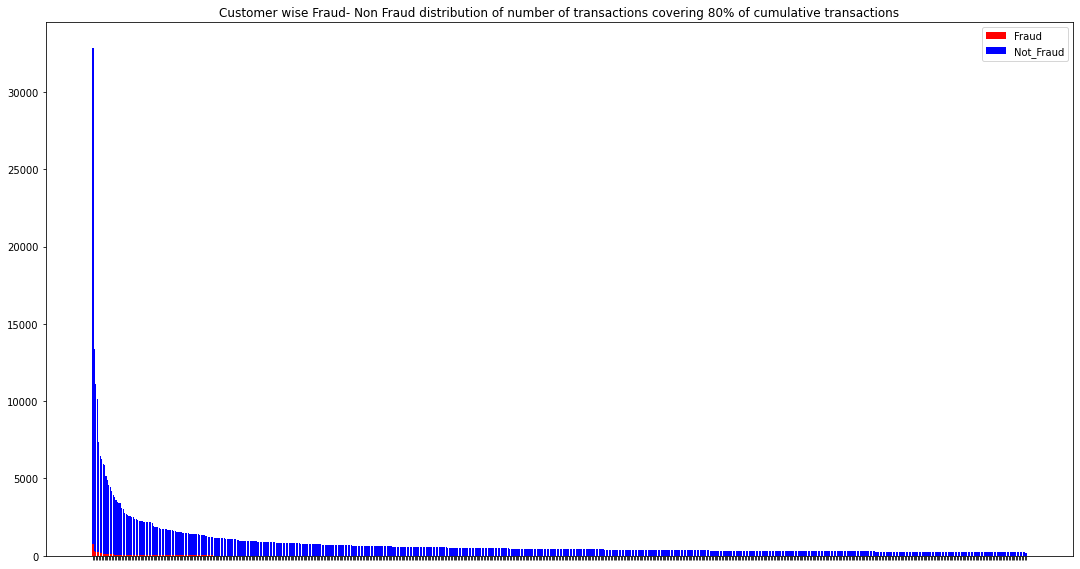

In [28]:
customers = customers_fraud_df_80['customerid'].unique()
fraud = customers_fraud_df_80.loc[customers_fraud_df_80['isfraud']==True,'nooftransactions',]
nonfraud = customers_fraud_df_80.loc[customers_fraud_df_80['isfraud']==False,'nooftransactions']

fig, ax = plt.subplots( figsize = (15,8))
fig.subplots_adjust(bottom=0.15, left=0.2)
fig.tight_layout()
ax.set_title('Customer wise Fraud- Non Fraud distribution of number of transactions covering 80% of cumulative transactions')
# customer_fraud = customers_fraud_df_80[customers_fraud_df_80.isfraud ==False]
# customer_nonfraud = customers_fraud_df_80[customers_fraud_df_80.isfraud ==True]
ax.bar(customers, fraud,color='r')
ax.bar(customers, nonfraud,color='b',bottom = fraud)
ax.set_xticks(np.arange(len(customers)))
ax.set_xticklabels([]) 
ax.legend(labels=[ 'Fraud', 'Not_Fraud',], loc  = 'upper right')
ax.set_ylabel = 'Number of transactions'
ax.set_xlabel = 'customer id'


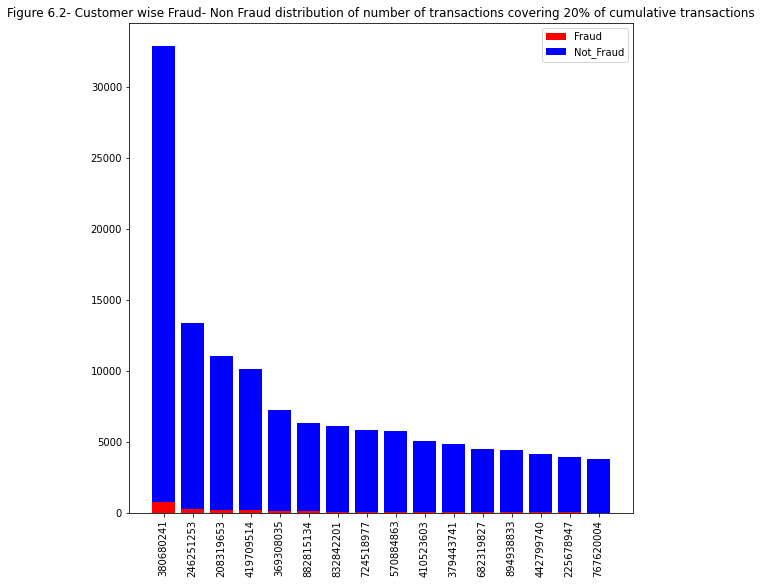

In [29]:
cc_20 = cc.loc[cc['cumsum']<=20,'customerid'].unique()
customers_fraud_df_20 =customers_fraud_df.loc[customers_fraud_df['customerid'].apply(lambda x : x in cc_20),].reset_index(
    drop= True).sort_values(by=(['isfraud','nooftransactions']), ascending =False).reset_index(drop = True)

customers_fraud_df_20['customerid'] = customers_fraud_df_20['customerid'].astype(str)
customers = customers_fraud_df_20['customerid'].unique()
fraud = customers_fraud_df_20.loc[customers_fraud_df_20['isfraud']==True,'nooftransactions',]
nonfraud = customers_fraud_df_20.loc[customers_fraud_df_20['isfraud']==False,'nooftransactions']

fig, ax = plt.subplots( figsize = (10,10))
fig.subplots_adjust(bottom=0.2, left=0.2)
ax.set_title('Figure 6.2- Customer wise Fraud- Non Fraud distribution of number of transactions covering 20% of cumulative transactions')

# customer_fraud = customers_fraud_df_80[customers_fraud_df_80.isfraud ==False]
# customer_nonfraud = customers_fraud_df_80[customers_fraud_df_80.isfraud ==True]
ax.bar(customers, fraud,color='r')
ax.bar(customers, nonfraud,color='b',bottom = fraud)
ax.set_xticks(customers)
ax.set_xticklabels(customers, rotation = 90) 
ax.legend(labels=[ 'Fraud', 'Not_Fraud',], loc  = 'upper right')
ax.set_ylabel = 'Number of transactions'
ax.set_xlabel = 'customer id'


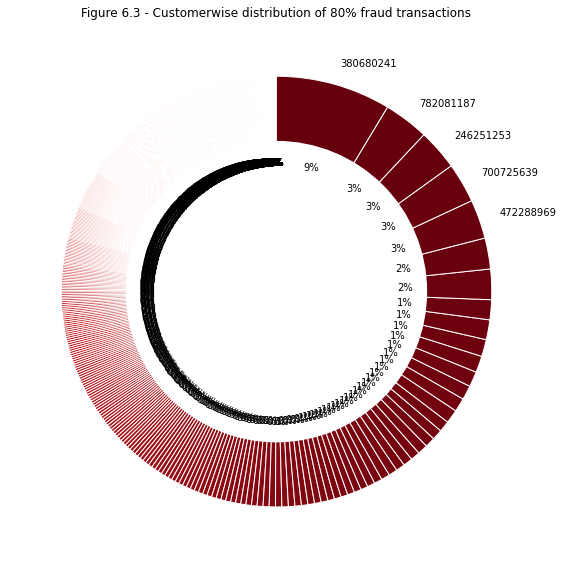

In [30]:
customers_fraud_80 = customers_fraud_df_80.loc[customers_fraud_df_80['isfraud']==True,].sort_values(by='nooftransactions')
cmap = plt.cm.get_cmap('Reds')

values = customers_fraud_80['nooftransactions']
colors = cmap(np.linspace(0., 1., len(values)))
labs = customers_fraud_80['customerid'].tolist()
labs = [cust if labs.index(cust)> 642 else '' for cust in labs]
fig, ax = plt.subplots( figsize=(8,8))
ax.pie(values,colors  = colors, labels=labs, autopct='%0.0f%%', startangle=90, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
plt.title("Figure 6.3 - Customerwise distribution of 80% fraud transactions")
plt.tight_layout()
plt.show()